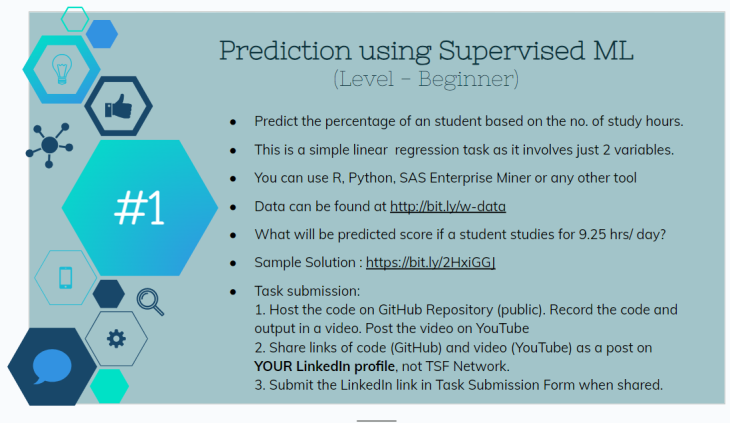


# TSF GRIP Task #1
## Given by The Sparks Foundation For the Data Science and Buisness Analysis Internship

## By Anuj Nanda Gorkhali 
##### anuj.gorkhali@gmail.com




For predictting the percentage of a student based on the no of study hours, we can use simple ligression model. The respective implementation is given below


In [1]:
#Import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read the dataset which is given in the link http://bit.ly/w-data

df= pd.read_csv('student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


As we can see, the dataset contains just two variables
1. Hours : Float,continuous numeric data representing different time durations.
2. Scores : Integer,scores of the students for each time durations they studied.


## Data Preprocessing

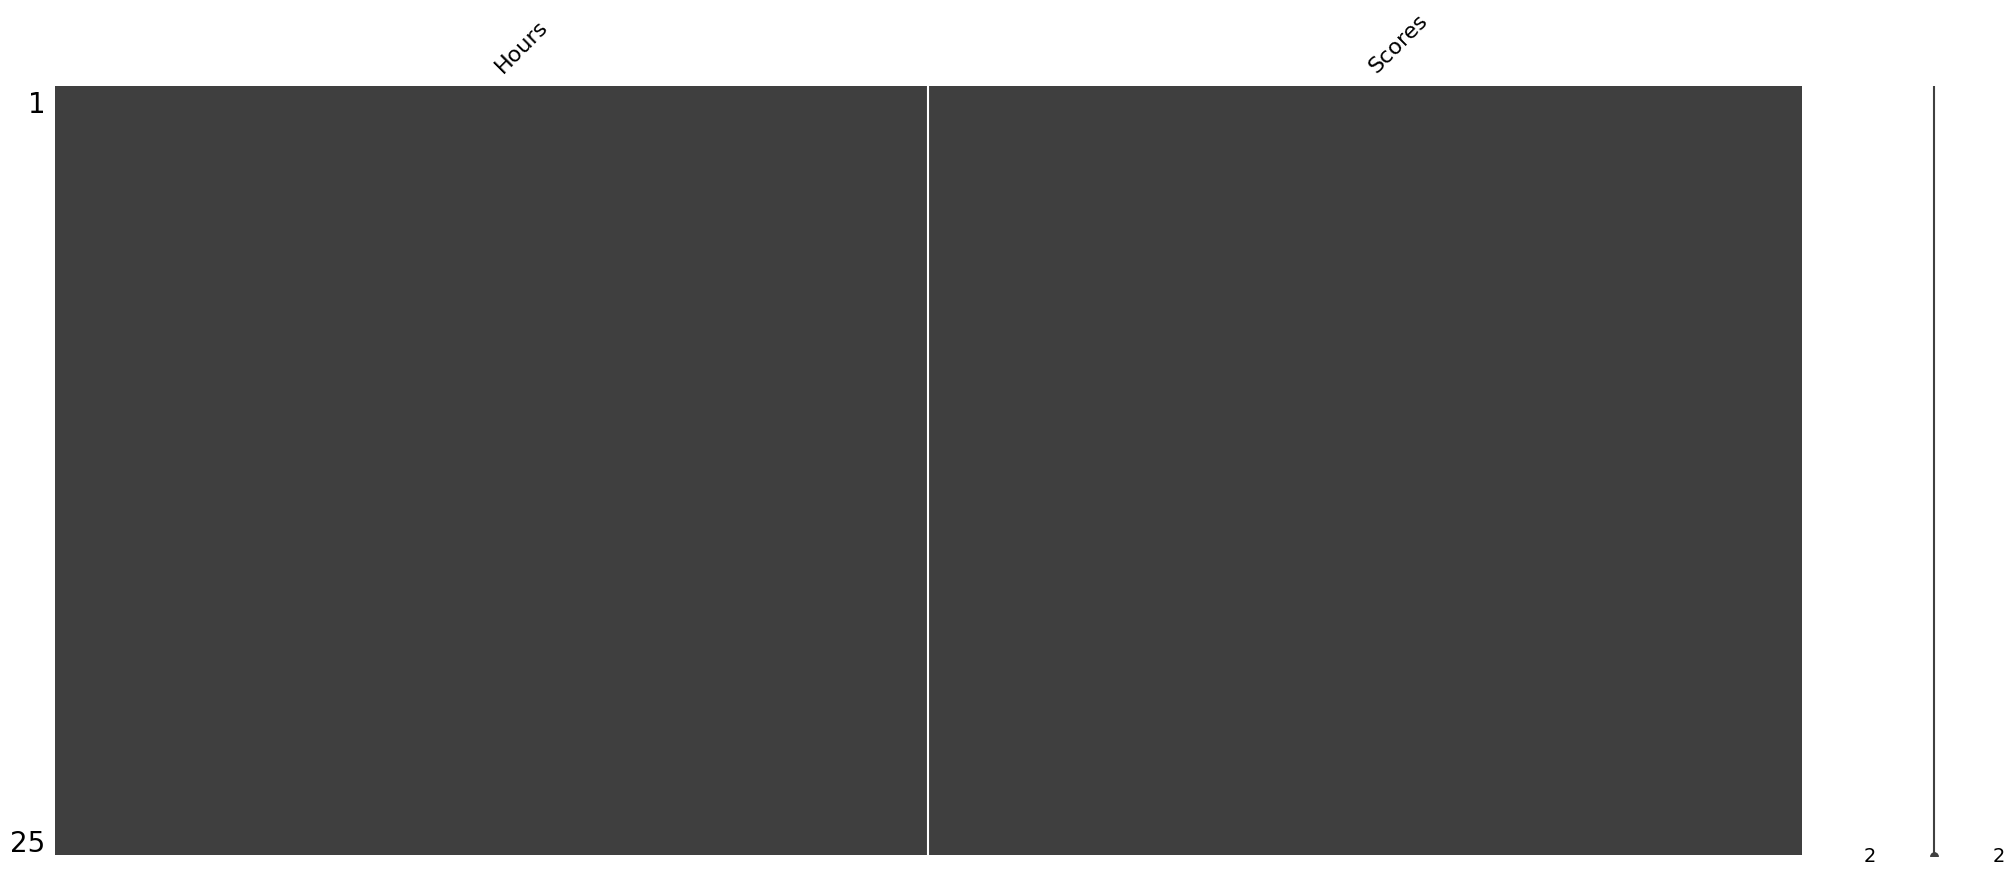

In [5]:
#checking missing values using missingno
import missingno as msno
msno.matrix(df);

In [6]:
#checking duplicates
df.duplicated().sum()

0

## Summary of Dataset

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


 🔑The maximum score student scored is 95.000
 
 🔑The maximum a student has studies is 9.2 hours
 
 🔑Average study hours is 5.01200 whereas average score is 47.000

### Create a Scatter Plot

Now, we visualize the distribution of scores using scatter plot to find any relationship between the data.

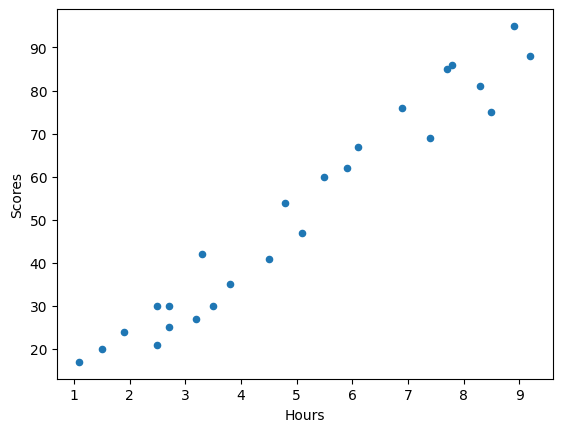

In [8]:
df.plot.scatter(x='Hours',y='Scores')
plt.show()

From the above graph, we can see that there is positive linear relationship between number of hours studie and percentage of score

🔑The more hours student put into studies, the higher of a score they get 

## Create a heatmap showing correlation

In [9]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

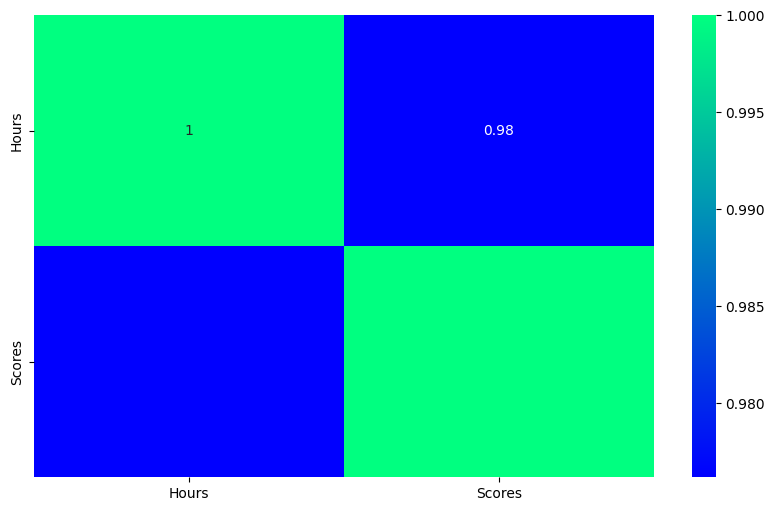

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='winter')
plt.show()

The value of 0.9 is close to 1, which signifies a very strong correlation. The closer the correlation coefficient is to 1, the stronger the linear relationship between the variables.one variable (hours) increases, the other variable (scores) tends to increase as well.

## Predicting using Linear Regression Model

We can train simple linear regression model, so as to predict the score of students. For this, firstly import the linear regression model from library.

In [11]:
from sklearn.linear_model import LinearRegression


In [12]:
#define dependant and independent variables
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values



In [13]:
# training the model

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [14]:
#Model Training
lr= LinearRegression()
lr.fit(X_train,Y_train)


LinearRegression()

In [15]:
#intercept
intercept = lr.intercept_
coef= lr.coef_
print(f"Intercept: {intercept}")
print(f"Coefficient: {coef}")

Intercept: 2.3708153823418883
Coefficient: [9.78856669]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


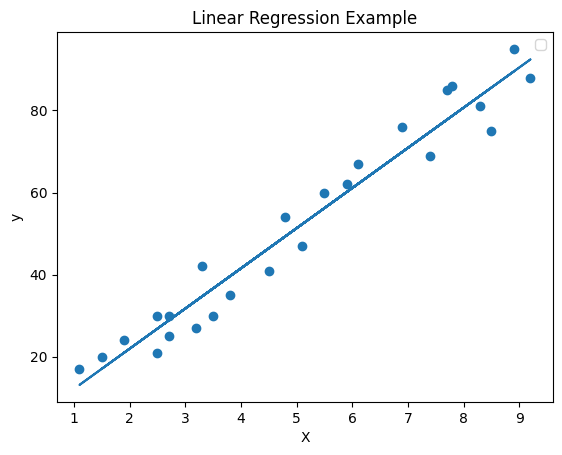

In [16]:
#Plotting the regression line
line=coef*X + intercept
plt.scatter(X, y)
plt.plot(X,line)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

In [17]:
#Predicing the dependent variable Y using testdata
pred= lr.predict(X_test)
pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

## Model Evaluation

In [18]:
#comparing actual vs Predicted

dfme= pd.DataFrame({'Actual': Y_test,'Predicted':pred})
dfme

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [19]:
from sklearn import metrics
print('Mean Absolute Error:' ,metrics.mean_absolute_error(Y_test,pred))

Mean Absolute Error: 4.419727808027651


## Calculating Score of student who studies for 9.25 hours a day

In [20]:
hours = 9.25
pred_score = lr.predict([[hours]])

print(f'No of Hours={hours}')
print(f'Predicted Score={pred_score[0]}')

No of Hours=9.25
Predicted Score=92.91505723477056
